In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
%%capture

from djimaging.user.alpha.utils import database
# Choose indicator by uncommenting one of the following lines
#indicator = 'calcium'
indicator = 'glutamate'

database.connect_dj(indicator=indicator)

In [3]:
ca_cells = [
    dict(date="2020-06-08", exp_num=1),
    dict(date="2020-05-11", exp_num=1),
]

ca_cells = pd.DataFrame(ca_cells)
ca_cells.date = pd.to_datetime(ca_cells.date)
ca_cells = ca_cells.set_index(['date', 'exp_num'])
ca_cells

,
date,exp_num
2020-06-08,1
2020-05-11,1


In [4]:
df_cell_location = database.get_loc_df(roi_kind='soma' if indicator == 'calcium' else 'field',
                                       annotate_cells=ca_cells if indicator == 'calcium' else None)
df_cell_location

ventral_dorsal_pos  temporal_nasal_pos group
date       exp_num                                              
2020-11-03 1                  0.119786           -0.671256     t
           2                 -0.176650            0.698416     n
2020-11-04 1                 -0.031509           -0.750169     t
           2                  0.043888           -0.935850     t
           3                  0.152911           -0.887210     t
           5                  0.076545           -0.527138     t
           6                 -0.168023           -0.650480     t
2020-11-10 2                 -0.491123            0.516102     n
           3                 -0.146396           -0.757493     t
2020-11-11 1                 -0.212851            0.454311     n
2020-11-27 1                 -0.640289            0.324443     n
           2                 -0.504004            0.198443     n

In [5]:
from alphaanalysis import plot as plota

plota.set_default_params()

In [6]:
FIGURE_FOLDER = './figures'

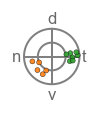

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(1.0, 1.0))

plota.plot_cell_locations(
    df_cell_location,
    indicator=indicator,
    text=True,
    alpha=0.9,
    ax=ax,
    s=9,
)
ax.get_legend().set_visible(False)
plt.tight_layout()
fig.savefig(os.path.join(FIGURE_FOLDER, f'cell_locations_small_{indicator}.pdf'))

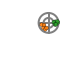

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(0.5, 0.5))

plota.plot_cell_locations(
    df_cell_location,
    indicator=indicator,
    text=False,
    alpha=0.9,
    ax=ax,
    s=5,
    clip_on=False,
)
ax.get_legend().set_visible(False)
plt.tight_layout()
fig.savefig(os.path.join(FIGURE_FOLDER, f'cell_locations_tiny_{indicator}.pdf'))